# Calibración de la Cámara usando OpenCV

## 0. Resumen
1. Patrón
2. Sacar fotos desde diferentes puntos de vista
3. Encontrar esquinas
4. Ecuaciones de proyección patrón->foto

\begin{equation}
s \begin{bmatrix}
u_i \\ v_i \\ 1
\end{bmatrix} =
\begin{bmatrix}
K
\end{bmatrix}
\begin{bmatrix}
R_k | t_k
\end{bmatrix}
\begin{bmatrix}
X_i \\ Y_i \\ Z_i \\ 1
\end{bmatrix}
\end{equation}

K: 5 (o 4) parámetros

R: 5 (o 9) parámetros

t: 3 parámetros

5. Hallar K, R_k, t_k y de yapa los coeficientes de distorsión.
6. Rectificar la imagen  
7. Bonus: dibujar en 3D  

## 1. Patrón

![](patron.png)



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("OpenCV version " + cv2.__version__)
print("Numpy version " + np.__version__)
import cv2 as cv

OpenCV version 4.5.1
Numpy version 1.19.1


In [ ]:
width = 9
height = 6
cell_size = 100
 
width_pix = (width + 1) * cell_size + cell_size  # add extra  qipan_cell  for reserve blank
height_pix = (height + 1) * cell_size + cell_size
 
image = np.zeros((height_pix, width_pix, 3), dtype=np.uint8)
image.fill(255)
 
#Create display window
win_name = "ChessBoard"
cv.namedWindow("ChessBoard",cv.WINDOW_AUTOSIZE)
cv.imshow(win_name, image)
color = (255,255,255)
 
y0 = 0
fill_color = 0
for j in range(0,height + 1):
    y = j * cell_size +20
    for i in range(0,width+1):
        x0 = i * cell_size +20
        y0 = y
        rect_start = (x0,y0)
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        rect_end = (x1,y1)
        cv.rectangle(image, rect_start, rect_end,color, 1, 0)
        image[y0:y1,x0:x1] = fill_color
        if width % 2: 
            if i != width:
                fill_color = (0 if ( fill_color == 255) else 255)
        else:
            if i != width + 1:
                fill_color = (0 if ( fill_color == 255) else 255)
   

 
cv.imwrite(f"calib/qipan_{width}_W_{height}_H.jpg",image)
cv.imshow(win_name, image)
 
cv.waitKey()

In [2]:
import glob

import PIL.ExifTags
import PIL.Image

## 2. Fotos desde distintos puntos de vista

In [12]:
# Carpeta con las fotos:
calib_fnames = glob.glob('./calib/*')

mostrar_figuras = True
idx=3

In [4]:
calib_fnames

['./calib/IMG_20210717_155647_819.jpg',
 './calib/IMG_20210717_155620_040.jpg',
 './calib/qipan_9_W_6_H.jpg',
 './calib/IMG_20210717_160851_222.jpg',
 './calib/IMG_20210717_155634_191.jpg',
 './calib/IMG_20210717_160855_652.jpg',
 './calib/IMG_20210717_155609_673.jpg']

## 3, 4, 5. Identificación de Esquinas, Encontrar Matriz de Cámara

In [5]:
# Tamaño del tablero:
ch_size = (9, 6)

# lista de todos los puntos que vamos a recolectar
obj_points = list()
img_points = list()

# Lista de los puntos que vamos a reconocer en el mundo
# objp={(0,0,0), (1,0,0), (2,0,0) .... }
# corresponden a las coordenadas en el tablero de ajedrez.
objp = np.zeros((np.prod(ch_size), 3),  dtype=np.float32)
objp[:, :2] = np.mgrid[0:ch_size[0], 0:ch_size[1]].T.reshape(-1, 2)
print(objp)

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]]


Procesando: ./calib/IMG_20210717_155647_819.jpg... False
Procesando: ./calib/IMG_20210717_155620_040.jpg... False
Procesando: ./calib/qipan_9_W_6_H.jpg... True
Encontramos esquinas!
Buscando esquinas en resolución subpixel... OK!


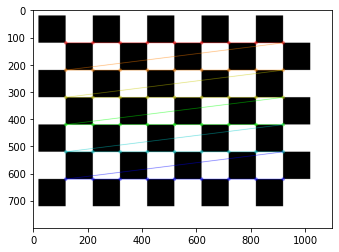

Procesando: ./calib/IMG_20210717_160851_222.jpg... True
Encontramos esquinas!
Buscando esquinas en resolución subpixel... OK!


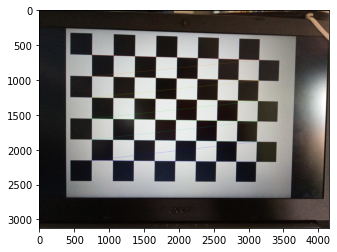

Procesando: ./calib/IMG_20210717_155634_191.jpg... False
Procesando: ./calib/IMG_20210717_160855_652.jpg... True
Encontramos esquinas!
Buscando esquinas en resolución subpixel... OK!


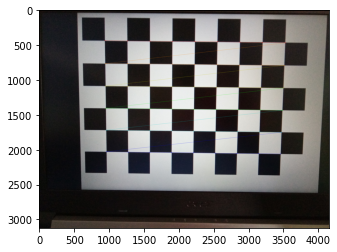

Procesando: ./calib/IMG_20210717_155609_673.jpg... False


In [6]:
# Criterio de corte para el proceso iterativo de refinamientoi de esquinas.
# Parar si iteramos maxCount veces o si las esquinas se mueven menos de epsilon
maxCount = 25
epsilon = 0.001
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_MAX_ITER, maxCount, epsilon)
cb_flags = cv2.CALIB_CB_ADAPTIVE_THRESH  
#cb_flags = cv2.CALIB_CB_FAST_CHECK

#%matplotlib qt

for image_fname in calib_fnames:
    print("Procesando: " + image_fname , end='... ')
    img = cv2.imread(image_fname)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # para subpixel solamente gray
    ret, corners = cv2.findChessboardCorners(img_gray, ch_size, flags=cb_flags)
    print(ret)
    if ret:
        print('Encontramos esquinas!')
        obj_points.append(objp)
        print('Buscando esquinas en resolución subpixel', end='... ')
        corners_subp = cv2.cornerSubPix(img_gray, corners, (5, 5), (-1, -1), criteria)
        print('OK!')
        img_points.append(corners_subp)
        cv2.drawChessboardCorners(img, ch_size, corners_subp, ret)
        if mostrar_figuras:
            plt.figure()
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.show()

In [7]:
#print(img_points)
print(len(img_points))

3


## 5. Calibración
Listo con la identificación de puntos, ahora a calibrar


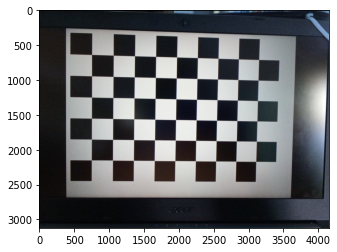

In [13]:
img = cv2.imread(calib_fnames[idx])
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = img_gray.shape

plt.figure()
plt.imshow(img)
plt.show()

In [14]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points,
                                                   (w, h), None, None)

print('Camera Matrix = ')
print(mtx)
print('Distortion Coefficients = ')
print(dist)

Camera Matrix = 
[[4.07157298e+03 0.00000000e+00 2.13982823e+03]
 [0.00000000e+00 4.05936700e+03 1.68815988e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients = 
[[-0.02633487  0.12844463  0.00077539  0.00062111 -0.15529742]]


In [15]:
print('Leyendo datos del header EXIF ...')
exif_img = PIL.Image.open(calib_fnames[idx])

exif_data = {
 PIL.ExifTags.TAGS[k]: v
 for k, v in exif_img._getexif().items()
 if k in PIL.ExifTags.TAGS
}

#print('Full exif dump:')
#import pprint
#pprint.pprint(exif_data)

focal_length_exif = exif_data['FocalLength'] # tuple (p, q) -> p/q
focal_length = focal_length_exif#[0]/focal_length_exif[1]
print('Distancia focal = ', focal_length, 'mm')

Leyendo datos del header EXIF ...
Distancia focal =  3.39 mm


## 6. Rectificación (undistort)

Rectificando imagen...


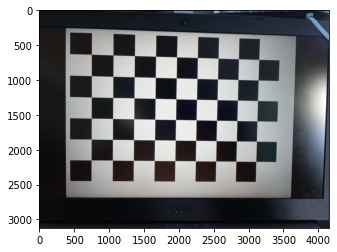

In [16]:
print('Rectificando imagen...')

img_to_undistort = cv2.imread(calib_fnames[idx])

dst = cv2.undistort(img_to_undistort, mtx, dist)

plt.figure()
plt.imshow(dst)
plt.show()

## A. Bonus: Dibujando en el Espacio

In [17]:
esquinas_3d = np.float32([[0,0,0], [0,1,0], [1,1,0], [1,0,0],
                           [0,0,-1],[0,1,-1],[1,1,-1],[1,0,-1]])


esquinas_2d, _ = cv2.projectPoints(esquinas_3d,rvecs[idx],tvecs[idx],mtx,dist)
esq_2d = esquinas_2d[:,0, :]

#the underscore allows to discard the second output parameter (see doc)
r = (0, 0, 255)  # r (in BGR)
b = (255, 0, 0)  # b (in BGR)
g = (0, 255, 0)  # g (in BGR)
line_width = 3

img=cv2.imread(calib_fnames[idx])
# base
cv2.line(img, tuple(esq_2d[0]), tuple(esq_2d[1]), r, line_width)
cv2.line(img, tuple(esq_2d[1]), tuple(esq_2d[2]), r, line_width)
cv2.line(img, tuple(esq_2d[2]), tuple(esq_2d[3]), r, line_width)
cv2.line(img, tuple(esq_2d[3]), tuple(esq_2d[0]), r, line_width)

# pilares
cv2.line(img, tuple(esq_2d[0]), tuple(esq_2d[4]), b, line_width)
cv2.line(img, tuple(esq_2d[1]), tuple(esq_2d[5]), b, line_width)
cv2.line(img, tuple(esq_2d[2]), tuple(esq_2d[6]), b, line_width)
cv2.line(img, tuple(esq_2d[3]), tuple(esq_2d[7]), b, line_width)

# tapa
cv2.line(img, tuple(esq_2d[4]), tuple(esq_2d[5]), g, line_width)
cv2.line(img, tuple(esq_2d[5]), tuple(esq_2d[6]), g, line_width)
cv2.line(img, tuple(esq_2d[6]), tuple(esq_2d[7]), g, line_width)
cv2.line(img, tuple(esq_2d[7]), tuple(esq_2d[4]), g, line_width)

# cv2.line(img, tuple(start_point), tuple(end_point),(0,0,255),3) #we set the color to r (in BGR) and line width to 3

plt.figure()
plt.imshow(img[..., ::-1])
plt.show()




IndexError: list index out of range


## Para estudiar:

1. Los flags que se le pasan a calibrateCamera
2. Iteraciones
3. Diferentes cámaras
4. Probar de dibujar cosas complejas